# Analysis of the the single intein
This notebook is for conducting analysis on the **Thiol sensitive intein** (Abbreviated TSI).

## Installing and importing the necessary libraries

In [1]:
# installing the libraries 
# uncomment the lines below to make sure that the required libraries are installed
# install.packages("tidyverse")
# install.packages("ggthemes")
# install.packages("ggplot2")
# install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading the csv file that has the results of the simulation

In [3]:
intein <- read_csv("intein.csv")
head(intein)

Rows: 3440 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,ASITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,362.1068,0.00000,104,8580.714,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,0.0000000,0
mutant,1,A,C,CYS,1AtoC,CSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,413.7276,51.62086,104,8599.590,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,18.8757359,0
mutant,1,A,D,ASP,1AtoD,DSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,446.3807,84.27391,104,8596.750,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,16.0355577,0
mutant,1,A,E,GLU,1AtoE,ESITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,653.4236,291.31682,104,8585.626,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,4.9110617,0
mutant,1,A,F,PHE,1AtoF,FSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,603.7107,241.60395,104,8609.113,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,28.3985160,0
mutant,1,A,G,GLY,1AtoG,GSITGDALVALPEGESVRIADIVPGARPNSDNAIDLKVLDRHGNPVLADRLFHSGEHPVYAVRTVEGLRVTGTANHPLLCLVDVAGVPTLLWKLIDEIKPGDYAVIQRSAFSTVGVPGLVRFLEAHHRDPDAKAIADELTDGRFYYAKVASVTDAGVQPVYSLRVDTADHAFITNGFVSHN,381.2703,19.16354,104,8580.383,LLEELLLEEELLLLLEEEHHHLLLLLLLLEEEEEEEEEELLLLLEEEEEEEEEEEEEEEEEEEELLLLEEEEELLLEEEEEEEELLEEEEEEEEHHHLLLLLEEEEEHHHLLLLLLLLHHHHHHHLLLLLLHHHHHHHHHLLLEEEEEEEEEEEEEEEEEEEEEELLLLLEEEELLEEEEL,0,-0.3310385,0


#### Increasing readability 
Removing the new_seq and secondary sequence of the file to incrase readability.

In [9]:
intein_short <- intein |> select(-c(new_seq, secondary_structure))
head(intein_short)

type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,362.1068,0.00000,104,8580.714,0,0.0000000,0
mutant,1,A,C,CYS,1AtoC,413.7276,51.62086,104,8599.590,0,18.8757359,0
mutant,1,A,D,ASP,1AtoD,446.3807,84.27391,104,8596.750,0,16.0355577,0
mutant,1,A,E,GLU,1AtoE,653.4236,291.31682,104,8585.626,0,4.9110617,0
mutant,1,A,F,PHE,1AtoF,603.7107,241.60395,104,8609.113,0,28.3985160,0
mutant,1,A,G,GLY,1AtoG,381.2703,19.16354,104,8580.383,0,-0.3310385,0


## General Analysis
A general analysis of all of the mutations. In section of analysis no grouping has been done and single mutation are analyzed individually. 

### Delta Delta G Analysis 
Creating a histogram of DDG.
> Unlike the `docked_analysis` notebook where there were some mutations that resulted in a lower ΔΔG, such mutation is not observed here. There are **two interesting patterns** here. Firstly, it seems that the **majority of the mutations are not changing ΔΔG** and **the ones that are changing it are only increaseing the ΔΔG**

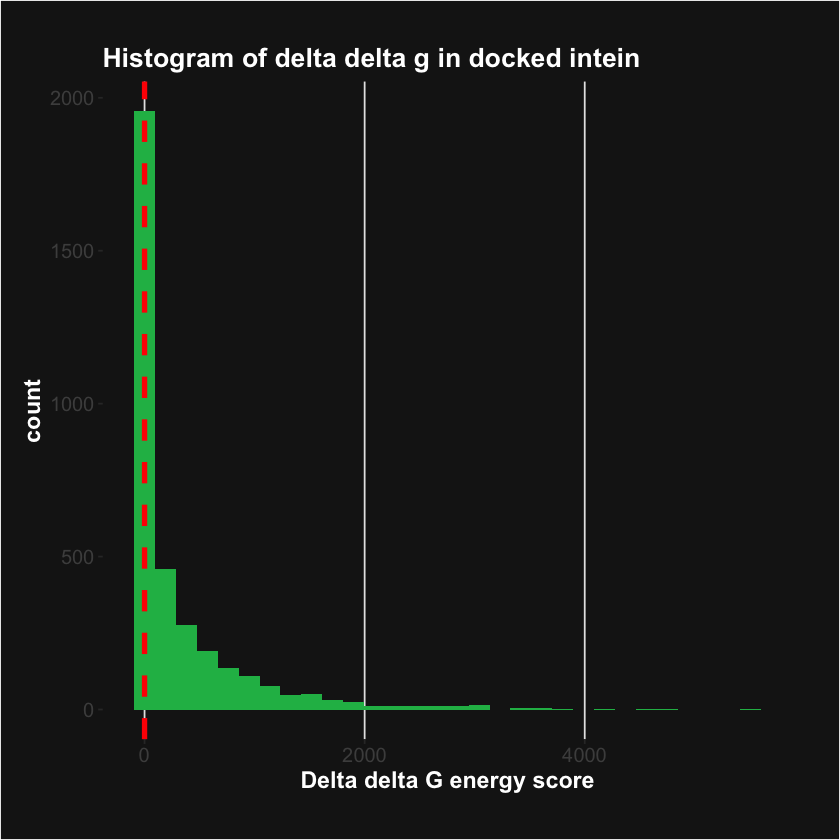

In [20]:
wildtype_ddg <- (intein_short |> filter(type == "wild_type"))$ddg_score
intein_short |> ggplot(aes(ddg_score)) + 
    geom_histogram(fill = "#1DB954", bins = 30) + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in docked intein") +
  labs(x = "Delta delta G energy score", y = "count") +
  geom_vline(xintercept = wildtype_ddg, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### Taking a look at the higher end
Let's see if we can find a pattern on ΔΔG scores higher than `3000`